# Intro to Keras, Tensorflow and advanced NN


<center><img src="figures/keras-tensorflow-logo.jpg"></center>

## Introduction

* TensorFlow is an end-to-end open source platform for ML 
* It has a comprehensive, flexible ecosystem of tools and libraries 
* Allows to easily build and deploy ML powered applications.
* Not only Neural Networks




## https://keras.io

* Keras is a high-level neural networks API (front-end), written in Python
* Capable of running on top of TensorFlow, CNTK, or Theano (backends)
* Built to simplify access to more complex backend libraries

## https://keras.io

Use Keras if you need a deep learning library that:

* Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
* Supports both convolutional networks and recurrent networks, as well as combinations of the two.
* Runs seamlessly on CPU and GPU.


## https://tensorflow.org

Use *TensorFlow* if you want a finer level of control:

* Build your own NN layers
* Personalized cost function
* More complex architectures than those available on Keras
    
We will be mostly writing python code using Keras libraries, but "under the hood" Keras is using tensorflow libraries.

The documentation is at [keras.io](https://keras.io).


## If you want to use R instead of python

* Keras can run on R as well, it will look quite similar to the code in this notebook
* (but, you know, with <- instead of =)
* You find the docs here: https://keras.rstudio.com/
* We will also have a lab session completely in R on Wednesday morning

## What is a tensor

The main variables in TensorFlow are, of course, tensors:

> A tensor is often thought of as a generalized matrix. That is, it could be a 1-D matrix (a vector), a 3-D matrix (something like a cube of numbers), even a 0-D matrix (a single number), or a higher dimensional structure that is harder to visualize. The dimension of the tensor is called its rank.





## What is a tensor

The main variables in TensorFlow are, of course, tensors:

> A tensor is often thought of as a generalized matrix. That is, it could be a 1-D matrix (a vector), a 3-D matrix (something like a cube of numbers), even a 0-D matrix (a single number), or a higher dimensional structure that is harder to visualize. The dimension of the tensor is called its rank.

## TensorFlow operates on tensors

> TensorFlow computations are expressed as stateful dataflow graphs. The name TensorFlow derives from the operations that such neural networks perform on multidimensional data arrays, which are referred to as tensors.

## The first step is to build a graph of operations

* NNs are defined in TensorFlow as graphs through which the data flows until the final result is produced
* Before we can do any operation on our data (images, etc) we need to build the graph of tensor operations
* When we have a full graph built from input to output, we can run (flow) our data (training or testing) through it.


## Tensors and data are *not* the same thing
* Tensors are, rather, a symbolic representation of the data
* Think about the function g = f(x): as long as we do not assign a value to x, we will not have a fully computed g
* In this case, "g" is the output tensor, "x" the input tensor, "f" the tensor operation


## Example

* We have a set of color images of size 1000x1000 pixels (1 megapixel) that we want to use on our NN 
* We define tensors with shape (n, 1000, 1000, 3)
    * n is the number of images that we are presenting to our network in one go ("batch block")
    * 1000\*1000: image pixels
    * 3 is the number of channels (RGB)
    * Grayscale images tensors would have shape (n, 1000, 1000, 1)

## One thing to remember when operating on tensors

The dimensions between tensors coming out of the n-th node and those going into the (n+1)-th node *must* match:

* If each sample in our dataset is made of 10 features, the first (input) layer must accept a tensor of shape (n, 10)
* If the first layer in our NN outputs a 3D tensor, the second layer must accept a 3D tensor as input
* Check the documentation to make sure what input-output shapes are allowed

## Here's how a NN layer looks like in TensorFlow:

<center><img src="figures/run_metadata_graph.png"></center>

## Here is how a model is built and trained in Keras

In [ ]:
#Multi-layer perceptron (one hidden layer)
#Logistic activations, one output
model = Sequential()
model.add(Dense(3, input_dim=3, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

#Gradient descent algorithm, Mean Squared Error as Loss function
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#Training for 10 iterations of the data (epochs)
history = model.fit(data, labels, epochs=10, batch=data.shape[0])

What does each bit do?

## A neural network in Keras is called a Model

The simplest kind of model is of the Sequential kind:

In [27]:
from keras.models import Sequential

model = Sequential()

This is an "empty" model, with no layers, no inputs or outputs are defined either.

Adding layer is easy:

In [ ]:
import keras
from keras.layers import Dense

model.add(Dense(units=3, activation='relu', input_dim=3))
model.add(Dense(units=2, activation='softmax'))



A "Dense" layer is a fully connected layer as the ones we have seen in Multi-layer Perceptrons.
The above is equal to having this network:

<center><img src="figures/simplenet.png"></center>


If we want to see the layers in the Model this far, we can just call:

In [37]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


Notice the number of parameters, can you tell why 12 and 8 parameters for each layer?

Using "model.add()" keeps stacking layers on top of what we have:

In [ ]:
model.add(Dense(units=2, activation=None))
model.summary()

One can also declare the model in one go, by passing a list of layers to Sequential() like so:

In [30]:
model = Sequential([
    Dense(units=3, activation='relu', input_dim=3),
    Dense(units=2, activation='softmax'),
    Dense(units=2, activation=None)
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


If we want to see the layers in the Model this far, we can just call:

In [ ]:
from keras.utils import plot_model

plot_model(model, "figures/simplenet_model.png", show_shapes=True)

## Exercise

* Can you build a sequential model to reproduce the graph shown in the figure? 
* Assume that this is a classifier
* Choose whatever activations you want, wherever possible
* How many classes are we predicting?

<center><img src="figures/sequence_api_exercise.png"></center>

In [ ]:
from keras.layers import #...

#Add your model here

plot_model(model, "figures/exercise_model.png", show_shapes=True)

## Keras layers (https://keras.io/api/layers/)

Common layers (we will cover all of these!)

* Trainable
    * <font color='red'>Dense (fully connected/MLP)</font>
    * Conv1D (2D/3D)
    * MaxPooling1D (2D/3D)
    * Recurrent: LSTM/GRU/Bidirectional


* Non-trainable
    * <font color='red'>Dropout</font>
    * Flatten
    * <font color='red'>Merge (Add/Multiply/Subtract/Concatenate)</font>
    * <font color='red'>Activation (Softmax/ReLU/Sigmoid/...)</font>

## Keras layers (https://keras.io/api/layers/)

Other useful layers (we will probably not cover these)

* Lambda (make your own layer!)
* BatchNormalization
* Reshape

## Dropout is a regularization layer

* It's applied to a previous layer's output
* Takes those outputs and randomly sets them to 0 with probability p
* Other outputs are scaled up so that the sum of the inputs remains unchanged
* if p = 0.5: model.add(Dropout(0.5))

In [38]:
from keras.layers import Dropout
import numpy as np
import tensorflow as tf

tf.random.set_seed(0)
drop = Dropout(0.5, input_shape=(4,))
data = np.arange(1,13).reshape(3, 4).astype(np.float32)

print("Before:", data, sep="\n")
output = drop(data, training=True)
print("After:", output, sep="\n")

Before:
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
After:
tf.Tensor(
[[ 0.  0.  6.  8.]
 [ 0. 12.  0. 16.]
 [18.  0. 22. 24.]], shape=(3, 4), dtype=float32)


## Dropout is a regularization layer

* Applying the same input twice will give different results
* Means that it is harder for the network to memorize patterns
* Helps curb overfitting
* Especially used with Dense() layers which are prone to overfitting
* Active only at training time

In [ ]:
from keras.layers import Dropout
import numpy as np
tf.random.set_seed(0)
drop = Dropout(0.5, input_shape=(4,))
data = np.arange(1,13).reshape(3, 4).astype(np.float32)

print("Before:", data, sep="\n")
output = drop(data, training=True)
print("After:", output, sep="\n")

## Lambda layers

* Work like regular lambda functions
* Inputs and outputs are tensors, functions inside must be keras/tensorflow functions

In [53]:
from keras.layers import Lambda

def outer_sum(inputs):

    x, y = inputs
    x = tf.reshape(x, [1, 3, 3])
    y = tf.reshape(x, [1, 3, 3])
    #input shape: batch, window, newaxis, channels
    outerSum = x[     :,      :, np.newaxis,        :] - y[:, np.newaxis, :, :]

    #output shape: batch, window, window, channels
    return outerSum

input_tensor = tf.range(0, 9)
print(input_tensor)
lambda_out = Lambda(outer_sum)([input_tensor, input_tensor])
lambda_out

tf.Tensor([0 1 2 3 4 5 6 7 8], shape=(9,), dtype=int32)


<tf.Tensor: shape=(1, 3, 3, 3), dtype=int32, numpy=
array([[[[ 0,  0,  0],
         [-3, -3, -3],
         [-6, -6, -6]],

        [[ 3,  3,  3],
         [ 0,  0,  0],
         [-3, -3, -3]],

        [[ 6,  6,  6],
         [ 3,  3,  3],
         [ 0,  0,  0]]]], dtype=int32)>

## Keras activations (https://keras.io/api/layers/activations/)

Activation functions for regression or inner layers:
* Sigmoid
* Tanh
* ReLU
* LeakyReLU
* Linear (None)

THE activation function for classification (output layer only):
* Softmax (ouputs probabilities for each class)

## Softmax

It's an activation function applied to a output vector z with K elements (one per class) and outputs a probability distribution over the classes:

<table><tr>
<td><img src="figures/simplenet.png" width=200></td>
<td><img src="figures/softmax.svg"></td>
</tr></table>

What makes softmax your favorite activation:

* K outputs sums to 1
* K probabilities proportional to the exponentials of the input numbers
* No negative outputs
* Monotonically increasing output with increasing input

Softmax is usually only used to activate the last layer of a NN

## ReLU vs. old-school logistic functions

* Historically, sigmoid and tanh were the most used activation functions
* Easy derivative
* Bound outputs (from -1 to 1)
* They look like this:

<img src="figures/logistic_curve.png" width=400>

## ReLU vs. old-school logistic functions

* Problems arise when we are at large |x|
* The derivative in that area becomes small (saturation)
* Remember what the chain rule said?

<img src="figures/logistic_curve.png" width=400>


## ReLU vs. old-school logistic functions

* When we have n layers, we have n activation functions
* At layer n the derivative is proportional to:
$$\begin{eqnarray} 
\frac{\partial L(w,b|x)}{\partial w_{ln}} & \propto &  \frac{\partial a_{ln}}{\partial z_{ln}}
\end{eqnarray}$$
* At layer 1 the derivative is proportional to:
$$\begin{eqnarray} 
\frac{\partial L(w,b|x)}{\partial w_{l1}} & \propto &  \frac{\partial a_{ln}}{\partial z_{ln}} \times \frac{\partial a_{n-1}}{\partial z_{ln-1}} \times \frac{\partial a_{ln-2}}{\partial z_{ln-2}} \ldots \times \frac{\partial a_{l1}}{\partial z_{l1}}
\end{eqnarray}$$
* It is the product of many numbers < 1
* Gradient becomes smaller and smaller for the initial layers
* Gradient vanishing problem

<!--- <img src="figures/large_net.png" width=400> -->

## ReLU is the first activation to address the issue

<center><img src="figures/relu.png" width=400></center>

Used in "internal" layers, usually not at last layer

Pros:
* Easy derivative (1 for x > 0, 0 elsewhere)
* Derivative doesn't saturate for x > 0: alleviates gradient vanishing
* Non-linear

Cons:
* Non-derivable at 0
* Dead neurons if x << 0 for all data instances
* Potential gradient explosion

## Other ReLU-like activations

LeakyReLU/PReLU
* y = $\alpha$x at x < 0
* In PReLU $\alpha$ is learned

<center><img src="figures/leakyrelu.png?0" width=400></center>


## <font color="white">Other</font>

ELU
* Derivable at 0
* Non-zero at x < 0

<center><img src="figures/elu.png?0" width=400></center>

## Setting activations in Keras

We can add activations as string parameters, or as functions:

In [ ]:
model = Sequential() 
model.add(Dense(units=2, activation='sigmoid'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=2, activation=keras.activations.relu))
model.add(Dense(units=2, activation='softmax'))

But also as separate layers

In [ ]:
import keras
from keras.layers import Activation

model = Sequential() 
model.add(Dense(units=2))
model.add(Activation('sigmoid'))
model.add(Dense(units=2))
model.add(Activation('relu'))
model.add(Dense(units=2))
model.add(Activation(keras.activations.relu))
model.add(Dense(units=2))
model.add(Activation('softmax'))

Once we have defined a model we want to "compile" it

This means chosing a Loss function and an Optimizer (the algorithm that finds the minimum loss possible).

In [ ]:
model.compile(optimizer='rmsprop',                    #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])                   #the metric doesn't influence the training

model.optimizer.get_config()

## Passing classes as parameters

* Some parameters can be set by passing a string (optimizer='rmsprop')
* we need to explicitly import the object if we want better control (optimizer=RMSprop())

In [ ]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(),                    #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])                   #the metric doesn't influence the training

model.optimizer.get_config()

## Passing classes as parameters

* Some parameters can be set by passing a string (optimizer='rmsprop')
* we need to explicitly import the object if we want better control (optimizer=RMSprop())

In [ ]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=1.0),   #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])                   #the metric doesn't influence the training

model.optimizer.get_config()

## Losses (https://keras.io/api/losses/)

These are the functions used to evaluate and train the neural network

Common losses for classification problems:
* CategoricalCrossentropy
* SparseCategoricalCrossentropy
* KLDivergence

Common losses for regression problems:
* MeanSquaredError
* MeanAbsoluteError

## Metrics (https://keras.io/api/metrics/)

Common metrics for classification:
* Accuracy/CategoricalAccuracy (respectively for integer labels or one-hot labels)
* SparseCategoricalCrossentropy/CategoricalCrossentropy (integer/one-hot labels)
* Precision/Recall
* AUC

Common metrics for regression:
* MeanSquaredError
* MeanAbsoluteError

## Metrics (https://keras.io/api/metrics/)

Notice the "metrics" parameter, which accepts a list of values. Multiple metrics can be shown during training.
Metrics are only to visualize how the training is going, they don't have an effect on training itself

In [ ]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=1.0),   #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy', 'recall'])         #the metric doesn't influence the training

## Optimizers (https://keras.io/api/optimizers/)

* They are algorithms for gradient descent
* A few to choose from:
    * SGD (Stochastic Gradient Descent)
    * RMSprop (Root Mean Square propagation)
    * Adadelta (Adaptive delta)
    * Adam (Adaptive Moment estimation)


<br>
<br>
<br>
<br>
<img src="figures/gradient_descent.png">

## Gradient Descent 

We have seen how gradient descent works:

For each epoch:
* Get predicted y (ŷ) for all N samples
* Calculate error (loss)
* Calculate all gradients (backprop)
* Apply gradients to weights
    
Pros/cons:
* Stable procedure
* Guarantees lower error at next step
* Will get stuck at local minimum

<br>
<br>
<br>
<br>
<img src="figures/gradient_descent.png">

## Stochastic Gradient Descent
For each epoch:
* Divide data in batch blocks of size n < N
* For each of the N/n blocks:
    * Get predicted y for n samples
    * Calculate partial loss
    * Calculate gradients (backprop)
    * Apply gradients to weights

Pros/cons:
* Noisy gradients
* Error will still go down overall
* Less likely to get stuck at local minimum

<br>
<br>
<br>
<br>
<img src="figures/gradient_descent.png">

## Optimizers (https://keras.io/api/optimizers/)

We need to choose a learning rate to multiply to our gradient. If it is too small, we risk taking too long to get to a minimum
<center><img src="figures/small_lr.png"></center>

## Optimizers (https://keras.io/api/optimizers/)

If it is too large, the network risks becoming unstable, explode

<center><img src="figures/large_lr.png"></center>

## Optimizers (https://keras.io/api/optimizers/)

Luckily there are algorithms to address these issues:
* Increase descent speed when past gradients agree with current, slow down otherwise (momentum)
* Annealing (decrease learning rate with passing time)
* Different learning rates for different parameters
* Adaptive learning rate based on gradient

<br>
<br>
<br>
<br>
<img src="figures/adaptive_lr.png">

## Optimizers (https://keras.io/api/optimizers/)

* They are algorithms for gradient descent
* A few to choose from:
    * SGD (stochastic gradient descent)
        * One learning rate, fixed
        * Old, but works well with Nesterov momentum
    * RMSprop
        * One learning rate per parameter
        * Adaptive learning rate (divide by squared mean of past gradients)
    * Adadelta (adaptive learning rate)
        * Similar to RMSprop, no need to set initial learning rate
    * Adam (Adaptive moment estimation)
        * Combines pros from RMSprop, Adadelta, works well with most problems


## Optimizers (https://keras.io/api/optimizers/)
<br>
<br>
<center><img src="figures/adam_et_al.png" width=500></center>
<div style="text-align: right">("Adam: A Method for Stochastic Optimization", 2015)</div>

## The functional API in Keras

* Sequential() is quite simple, but limited
* What if we want to have multiple input/output layers?
* What if we want a model that is not just a linear sequence of layers?

<img src="figures/functional_api_40_0.png">

# Functional API (https://keras.io/guides/functional_api)

* Layers are now treated as... functions
* Now the tensors are explicit variables
* Remember: g = f(x)
* Careful not to mix up tensors (arguments) and layers (functions)

In [ ]:
import tensorflow as tf

x = tf.constant([[2.0, 3.0, 4.0]]) #this is a tensor containing constant values
f = Dense(1, input_dim=3) #this is a layer with 3 inputs, 1 output
g = f(x)

print(x)
print(g)

Now, let's go back to the first neural network we built with Sequential()

In [ ]:
model = Sequential()

model.add(Dense(units=3, activation='relu', input_dim=3))
model.add(Dense(units=2, activation='softmax'))

model.summary()

And here is how we make the same model with the functional API:

In [ ]:
from keras.layers import Dense, Input

input_tensor = Input((3,)) #input is a bit like a layer, but it is a function that returns a tensor

dense1 = Dense(3, activation='relu') #Dense is a layer constructor, does NOT return a tensor but a layer
dense2 = Dense(2, activation='relu')

dense1_out = dense1(input_tensor) #when you apply a layer to a tensor, you get another tensor as output
dense2_out = dense2(dense1_out)
output_tensor = dense2_out

model = keras.Model(inputs=input_tensor, outputs=output_tensor, name="functional API model")
model.summary()

Note:
* Layer functions (Dense(...)) return layers...
* ... except for Input(), which returns a tensor instead
* We have to explicitly connect the "inputs" tensor to the "outputs" tensor to form the graph
* The input layer is explicitly represented in the first row of the table
* The input layer has 0 parameters

In [ ]:
model = keras.Model(inputs=input_tensor, outputs=output_tensor, name="functional API model")
model.summary()

## Exercise

* Can you use the functional API to reproduce the model shown in the figure? 
* As a hint, I will do all the imports for you, and I will initialize some of the layers
* Check the docs (keras.io) to see how each import should be used


* It's ok if you can't do it! We are just getting started after all...

<img src="figures/functional_api_40_0.png">

In [ ]:
from keras.layers import Input, Embedding, LSTM, Concatenate, Dense

title_input = Input((None,), name="title")
title_embed = Embedding(1000, 64, name="embedding")
title_lstm = LSTM(128, name="lstm", activation="sigmoid")

tags = Input((12,), name="tags")
concatenate = Concatenate(name="concatenate",axis=-1)

priority = Dense(1, name="priority", activation="...")

title_embed_out = title_embed(title_input)
title_lstm_out = title_lstm(title_embed_out)

concatenate_all = concatenate([title_lstm_out, ..., ...])

priority_out = priority(concatenate_all)

model = keras.Model(inputs=[..., ..., ...], outputs=[..., ...])
plot_model(model, "figures/apinet_model.png", show_shapes=True)

## Training the model: fit() function (https://keras.io/api/models/model_training_apis/)

* We are almost ready to train the model, I swear
* fit() is a method of the Model, actually launches training on a dataset with features and labels
* X_train, y_train: features and labels
* batch: how many samples between each weight update
* epochs: how many times we iterate through the dataset
* validation_data: used to evaluate the model at the end of every epoch, NOT used for training

In [ ]:
model.fit(X_train, y_train, batch=32, epochs=10, validation_data=(X_val, y_val))

## Training the model: fit() function (https://keras.io/api/models/model_training_apis/)

* Ok, last thing we need is the actual data, then we can train the model

In [ ]:
model.fit(X_train, y_train, batch=32, epochs=10, validation_data=(X_val, y_val), class_weight = None, steps_per_epoch=None)

## What is this validation thing? Do I really need it?

* Yes, yes you do
* Helps understanding if the model is learning anything useful
* Take some of your labelled data, set it aside, call it validation set and don't train on it
* Evaluate model on validation set at the end of each epoch, see if model works on unseen data
* If it works well on training set but not on validation set, you're overfitting

<img src="figures/overfitting_class.png" width=300>

## What is this validation thing? Do I really need it?

* If it works well on training set but not on validation set, you're overfitting
* Validation data is used to adapt hyperparameters, select best models
* Validation data is NOT testing data (those metrics do not go on papers!)
* More on this next Thursday

<img src="figures/early_stopping.png" width=500>

## There are multiple ways to pass data to fit()

* You can load all of the data in memory, assign it to:
    * numpy array or list of arrays (if you have multiple inputs/outputs)
    * TensorFlow tensors
    * A dictionary to map input names to arrays/tensors

In [ ]:
data = np.genfromtxt('path/to/dataset.csv',delimiter=',',skiprows=1)

X_train = data[:,0:10]
y_train = data[:,10]

model.fit(X_train, y_train,...)


## There are multiple ways to pass data to fit()


* Or you can pass it an object/function that generates data for you:
    * A generator() function
    * A keras.utils.Sequence object
    * A tensorflow.data.Dataset object

Here a quick example on how a generator that loads loads data from a list of files (images, pickle objects, csv files...) on the filesystem:


In [ ]:
def generator(input_list):
    input_list_file = open(input_list, 'r')
    while 1:
        for next_file in input_list_file:
        
            data = open(next_file, 'r').readlines()
            X = data[:,0:10]
            y = data[:,10]
        
            yield X,y
        input_list_file.seek(0)
        
model.fit(generator(train_data_list),...)

## Ok, can we PLEASE train a NN now?

* Let's generate some artificial data, see what happens
* Classification dataset, 2 classes
* Let's say 10,000 samples, three features per sample
* Random data

In [ ]:
# Generate dummy data
data = np.random.random((10000, 3))
labels = np.random.randint(2, size=(10000, 1))

#let's print the first sample (three floats) and its corresponding label:
print(np.hstack((data[0:10,:], labels[0:10])))

## We have the data, now make the model, compile it, train it

* Add Dropout for fun
* Don't forget that softmax activation!
* Batch size is 32, 10 epochs
* Take 10% of the data, reserve it for validation

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=3, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.1)

## Let's visualize our training curves

* Plots loss and accuracy for train and validation sets separately


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_loss_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train acc', 'val acc', 'train loss', 'val loss'], loc='upper left')
    plt.show()


## Let's visualize our training curves

* Plots loss and accuracy for train and validation sets separately
* The model didn't learn anything, which makes sense (data is random)

In [ ]:
plot_loss_acc(history)

## Do it again, but with data that actually means something

* Remember the XOR problem?
* A perceptron is not able to separate XOR classes
* A MLP should be able to

<img src="figures/3-IP-TRUTH-TABLE2.jpg">


Let's generate data that is not just binary, but behaves like it:

* A positive (+) input behaves like a 1
* A negative (-) input behaves like a 0
* -0.5 $\oplus$ 0.2 $\oplus$ -0.1 => 1

In [32]:
# Generate XOR data
data = np.random.random((10000, 3)) - 0.5
labels = np.zeros((10000, 1))

labels[np.where(np.logical_xor(np.logical_xor(data[:,0] > 0, data[:,1] > 0), data[:,2] > 0))] = 1

#let's print some data and the corresponding label to check that they match the table above
for x in range(5):
    print("{0: .2f} xor {1: .2f} xor {2: .2f} equals {3:}".format(data[x,0], data[x,1], data[x,2], labels[x,0]))

 0.04 xor  0.46 xor  0.18 equals 1.0
-0.42 xor -0.07 xor -0.31 equals 0.0
-0.32 xor  0.31 xor  0.09 equals 0.0
 0.45 xor  0.16 xor -0.01 equals 0.0
-0.19 xor  0.24 xor  0.49 equals 0.0


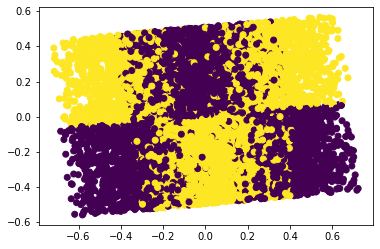

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed = pca.fit_transform(data)
plt.scatter(transformed[:,0], transformed[:,1], c=labels)

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=3, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.1)

## XOR data

* Better than random!
* Validation curves might be better than training curves because of Dropout

In [ ]:
plot_loss_acc(history)

## Exercise: can you do better?

* More layers? More neurons?
* Different activations?
* Different Dropout? No Dropout?
* Generate more data?
* More epochs?
* Different batch size?
* Different optimizer?
* It's up to you! Let's see who does best on validation

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=3, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.1)

## Regression problem: Boston housing dataset

* Can we predict the value of a house (in tens of thousands of dollars) based on 13 variables:
    *  CRIM     per capita crime rate by town
    * ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    * INDUS    proportion of non-retail business acres per town
    * CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    * NOX      nitric oxides concentration (parts per 10 million)
    * RM       average number of rooms per dwelling
    
    ...

## Boston housing dataset (http://lib.stat.cmu.edu/datasets/boston)

* Can you build a network to solve the problem?
* What types of layers?
* What types of activations?
* Hint: NNs like inputs between -1 and +1, data needs scaling
* Scale the output too? What if we didn't want to scale it?
* Who can do this best?

In [ ]:
from sklearn.preprocessing import StandardScaler #hint

#This is how we load the dataset, pre-split in training/validation sets
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=113)

#Let's have a look at the data
print(X_train.shape)
print(X_train[0], y_train[0])

model = Sequential()

model.add(...)

model.compile(...)
history = model.fit()

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_loss_mae(history, metric):
    
    fig,ax = plt.subplots()
    ax.plot(history.history[metric])
    ax.plot(history.history['val_' + metric])
    ax.set_ylabel(metric)
    ax2=ax.twinx()
    ax2.plot(history.history['loss'], c="red")
    ax2.plot(history.history['val_loss'], c="green")
    ax2.set_ylabel("loss")
    plt.title('model accuracy')
    #plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train ' + metric, 'val ' + metric, 'train loss', 'val loss'], loc='upper left')
    plt.show()
    
plot_loss_mae(history, '...')